## Code submission

If you would like to use Jupyter (perhaps the easiest way, this replaces the old IJuliaNotebook), just submit the notebook file. Name it as p(Homework#).ipynb.  For instance, for homework 1, name it as p1.ipynb. I suggest everyone use the latest version of Julia (current stable version **v0.7.0**. Please **DO NOT** use v1.0.0 **unless you know what you are doing**).  

If you use MATLAB or Julia/Python (not the notebook), name your main program as p(Homework#)_(Problem#).m. For instance, for homework 1, problem 2, name it as p1_2.m (or p1_2.jl,p1_2.py). 

For proof-related problems, type your solution using **LaTeX (no other format is accepted)**. You do not need to write down every step of the derivation, but make sure the logic is clear.  

For implementation based problems, the problem description may not include all the information for the answer to be uniquely defined. For instance, your answer might depend on the choice of the mesh size. This is OK.

E-mail the codes above, and **any supporting files** for the homework to bCourses

You can **either** name it as

lastname_firstname_1.ipynb (if you **only** have a notebook file)

**or**

lastname_firstname_1.zip (if you have **more than one** files)

## Problem 1

Consider reaction-diffusion equation with periodic boundary condition

$$u_t(x,t) = u_{xx}(x,t) + \varepsilon u^2,\quad x\in [0,2\pi],$$

$$u(x,0)=e^{-5(x-\pi)^2}, \quad u(0,t)=u(2\pi,t), u_x(0,t)=u_x(2\pi,t).$$

Here $\varepsilon = 1.0$. Use second order finite difference discretization with uniform grid spacing $\Delta x=2\pi/100$.

Obtain the solution $u(x,T)$ at $T=6.0$ using the following methods.

a) Implement a `ForwardEuler` method, using the forward Euler for time discretization and $\Delta t=0.001$.

b) Implement a `CNBroyden` method, using a trapezoidal rule for time discretization and $\Delta t = 0.1$. This is also called the Crank-Nicolson method. Use any type of Broyden's method to solve the nonlinear equation. The starting guess for Broyden's matrix can be chosen as $B_0=\alpha I$, $\alpha=0.05$. Plot the number of iterations of Broyden's method for each step to reach certain stopping criterion (say $10^{-8}$).

In [ ]:
using LinearAlgebra
using SparseArrays

function ForwardEuler(N,T,u0,A,epsil)

end



using PyPlot
figure(1,figsize=(5,5))
plot(xs,vec(uForwardEuler[:,1]),"b-")
plot(xs,vec(uForwardEuler[:,N]),"r-")



In [ ]:
function CNBroyden(N,T,u0,A,epsil,alpha,maxIter)

end



using PyPlot
figure(1,figsize=(5,5))
plot(xs,vec(uCNBroyden[:,1]),"b-")
plot(xs,vec(uCNBroyden[:,N]),"r-")

figure(2,figsize=(5,5))
plot(t[1:N],Niter,"b-o")

## Problem 2

Use the five-point finite difference formula and solve 

$$-\Delta u(x,y) = 1, \quad u\vert_{\partial \Omega} = 0,$$

on a $L$-shaped domain (see below, blue shaded region)

$$\Omega=((0,1)\times(0,1)) \backslash ([1/2,1]\times[1/2,1]).$$

Use a grid spacing $h=1/(N+1)$ and $N=200$. 

1) Write a function `FDLshape` which returns $X,Y,U$, so that $U_{i,j}$ is the approximate solution for $u(X[i,j],Y[i,j])$. If $(X[i,j],Y[i,j])$ is not in $\Omega$, $U_{i,j}=0$. Plot the solution $U$. You can solve the equation using the backslash directly.

2) Write a function `FDLshapeCG` which does the same job, but uses the conjugate gradient solver to solve the linear system and get the same result. You should write your own CG solver instead of using external packages.

┌ Info: Recompiling stale cache file /home/lin/.julia/compiled/v0.7/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1185
┌ Warning: Module Compat with build ID 1634148673862848 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:941
┌ Warning: Module Compat with build ID 1634148673862848 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:941
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1187
┌ Warning: Module Compat with build ID 1634148673862848 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:941
┌ Info: Recompiling stale cac

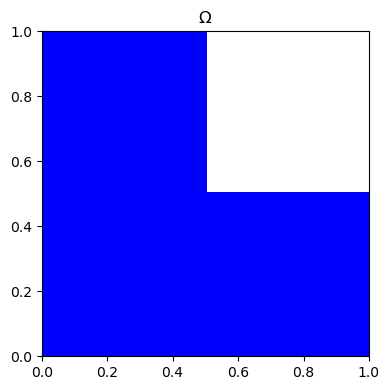

┌ Warning: Module Compat with build ID 1634148673862848 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:941


MethodError: MethodError: Cannot `convert` an object of type PyCall.PyObject to an object of type PyCall.PyObject
The applicable method may be too new: running in world age 27731, while current world is 29330.
Closest candidates are:
  convert(::Type{PyCall.PyObject}, ::PyCall.PyObject) at /home/lin/.julia/packages/PyCall/k8esQ/src/PyCall.jl:166 (method too new to be called from this world context.)
  convert(::Type{PyCall.PyObject}, ::Any) at /home/lin/.julia/packages/PyCall/k8esQ/src/PyCall.jl:165 (method too new to be called from this world context.)
  convert(::Type{T}, ::T) where T at essentials.jl:154
  ...

In [1]:
function ndgrid(v1::AbstractVector{T}, v2::AbstractVector{T}) where T
    m, n = length(v1), length(v2)
    v1 = reshape(v1, m, 1)
    v2 = reshape(v2, 1, n)
    (repeat(v1, 1, n), repeat(v2, m, 1))
end

x1d=LinRange(0,1,100)
X,Y=ndgrid(x1d,x1d)
Z=zeros(size(X))
for j = 1 : prod(size(X))
    if(X[j]>=0.5 && Y[j]>=0.5)
        Z[j] = 1.0
    else
        Z[j] = 0.0
    end
end

using PyPlot
figure(1,figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("b","w"))
title(L"\Omega")

In [ ]:
function FDLShape(L,N)

    return X,Y,U
end

X,Y,U = FDLShape(1.0,200)
h=figure(1,figsize=(5,5))
ax=Axes3D(h)
surf(X,Y,U,edgecolors="none",cmap=ColorMap("jet"),shade="true")
ax[:view_init](elev=30.0,azim=120.0)
xlabel(L"x")
ylabel(L"y")
zlabel(L"z")


In [ ]:
# Conjugate gradient solver

function CG(A,b,x0,tol=1e-5,maxit=1000)

    return x
end


function FDLShapeCG(L,N)

    return X,Y,U
end

X,Y,UCG = FDLShapeCG(1.0,200)
h=figure(1,figsize=(5,5))
ax=Axes3D(h)
surf(X,Y,UCG,edgecolors="none",cmap=ColorMap("jet"),shade="true")
ax[:view_init](elev=30.0,azim=120.0)
xlabel(L"x")
ylabel(L"y")
zlabel(L"z")


h=figure(2,figsize=(5,5))
ax=Axes3D(h)
surf(X,Y,U-UCG,edgecolors="none",cmap=ColorMap("jet"),shade="true")
ax[:view_init](elev=30.0,azim=120.0)
xlabel(L"x")
ylabel(L"y")
zlabel(L"z")


## Problem 3

Consider a matrix $A\in \mathbb{R}^{N\times N}$. $A$ is diagonalizable with only two distinct eigenvalues $\pm 1$. Prove that for any right hand side $b$ and initial guess $x_0$, GMRES solves the equation $Ax=b$ with at most 2 iterations.

## Problem 4

The nonlinear Schrodinger equation in 1D

$$\imath \partial_t u(x,t) = -\partial_{xx} u(x,t)+\beta \vert u(x,t)\vert^2 u(x,t), \quad x\in \mathbb{R}$$

has an exact solution  

$$\psi_{exact}(x,t) = \frac{2a}{\beta} \text{sech}\left[\sqrt{a}(x-x_0-ct)\right] \exp\left[\imath \frac{c}{2}(x-x_0)-\imath\left(\frac{c^2}{4}-a\right)t\right].$$

Here we choose the parameter

$\beta=-8.0,a=\beta^2/16,c=0.5,x_0=-3.0$.


Solve this problem on a finite sized domain $[-L/2,L/2]$ with $L=20$ and periodic boundary condition. Use the central finite difference scheme for spatial discretization. 

(1) Write a routine `rk4` to compute the solution at $T_f=1.0$ using the RK4 method. You need to choose the grid size (spatial and temporal) so that the maximum absolute error of the solution (by comparing to the exact solution) is less than $10^{-3}$.

(2) Write a routine `IMEX` to do the same thing with the IMEX method, where the implicit scheme is chosen to be the trapezoidal rule, and the explicit scheme is AB2.  If there is a linear system to be solved, use GMRES to solve the linear system.

In [ ]:
function rk4(NT,T,u0,Lap,β)
    return u
end

psiexact_func(x,t) = 2.0*a/β * sech(sqrt(a)*(x-x0-c*t)) * exp(im*(c/2.0*(x-x0)-(c^2/4.0-a)*t))

@. psi0 = psiexact_func(xs,0.0)

NT = 10000
Tf = 1.0
psi = rk4(NT,Tf,psi0,Lap,β)
@. psiexact = psiexact_func(xs,Tf)

using PyPlot
figure(1)
plot(xs,real(psi),label="RK4")
plot(xs,real(psiexact),label="exact")
legend()

figure(2)
plot(xs,abs.(psi-psiexact),label="Diff")
legend()



In [ ]:
function IMEX(NT,T,u0,Lap,β,tol,maxit)

    return u
end

NT = 1000
Tf = 1.0



using PyPlot
figure(1)
plot(xs,real(psi),label="IMEX")
plot(xs,real(psiexact),label="exact")
legend()

figure(2)
plot(xs,abs.(psi-psiexact),label="Diff")
legend()

